In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from scipy import stats as stat
from matplotlib.ticker import NullFormatter 

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# from wordcloud import WordCloud, STOPWORDS
# from textblob import TextBlob
import sys
from nltk.tokenize import word_tokenize

In [2]:
df2 = pd.read_csv('../data/Bitcoin_tweets2.csv', usecols = ['date', 'text'])

df1 = pd.read_csv('../data/BTC2.csv', usecols = ['Date',  'Vol.', 'Price', 'Change %'])

In [3]:
df1 = df1.dropna()
df2 = df2.dropna()

In [4]:
df2.shape

(1999534, 2)

In [5]:
df1['Change %'] = df1['Change %'].str.replace('%', '')

df1['Change %']=df1['Change %'].astype(str).astype(float)

In [6]:
df1 = df1.rename(columns={'Date': 'date'})
df1['date']= df1['date'].astype(str)

In [7]:
df1['date'] =pd.to_datetime(df1.date)
df1.sort_values(by=['date'], inplace=True, ascending=False)
df1.head()

,date,Price,Vol.,Change %
0,2021-12-31,"46,219.5",58.18K,-1.92
1,2021-12-30,"47,123.3",60.96K,1.42
2,2021-12-29,"46,461.7",63.92K,-2.28
3,2021-12-28,"47,545.2",74.39K,-6.18
4,2021-12-27,"50,678.2",43.90K,-0.20


In [8]:
df1 = df1[df1['Change %'] > 0]
df1.head()

,date,Price,Vol.,Change %
1,2021-12-30,"47,123.3",60.96K,1.42
5,2021-12-26,"50,779.9",32.34K,0.74
8,2021-12-23,"50,801.0",56.24K,4.53
10,2021-12-21,"48,902.0",57.88K,4.28
11,2021-12-20,"46,895.2",57.53K,0.41


In [9]:
df1.dtypes

date        datetime64[ns]
Price               object
Vol.                object
Change %           float64
dtype: object

In [10]:
df2['date'] = pd.to_datetime(df2.date, dayfirst=True, errors='coerce')
df2['date']=df2['date'].dt.date
df2['date'] = pd.to_datetime(df2.date, dayfirst=True, errors='coerce')


In [11]:
df2.head()


,date,text
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10,"Guys evening, I have read this article about B..."
3,2021-02-10,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10,This network is secured by 9 508 nodes as of t...


In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
df2['clean_tweet'] = np.vectorize(remove_pattern)(df2['text'], "@[\w]*")
df2['clean_tweet'] =df2['clean_tweet'].apply(lambda x: x.lower())

df2.head()

,date,text,clean_tweet
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,blue ridge bank shares halted by nyse after #b...
1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","😎 today, that's this #thursday, we will do a ""..."
2,2021-02-10,"Guys evening, I have read this article about B...","guys evening, i have read this article about b..."
3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,$btc a big chance in a billion! price: \487264...
4,2021-02-10,This network is secured by 9 508 nodes as of t...,this network is secured by 9 508 nodes as of t...


In [13]:
# df2['tweet_token'] =df2['clean_tweet'].apply(lambda x: word_tokenize(x))
# stop_words = set(stopwords.words('english'))
# df2['tweet_token_filtered'] =df2['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

In [14]:
df2.dtypes

date           datetime64[ns]
text                   object
clean_tweet            object
dtype: object

In [15]:
df2=df2[df2['text'].str.contains("want|need|demand|hold|moon|optimistic|positive|confident|strong|")]

#df2 = df2.loc[df2['text'].str.contains("regulation|strict|law|enforce|governance|administration|governing|handling|moderation|modulation|regimentation|jurisdiction|legislation", case=False)]
#df2=df2[df2['text'].str.contains("ethereum|etc|litecoin|ltc|cardano|ada|bch|stellar|xlm|solana|sol|ripple|monero|xrp|xmr")]



In [16]:
df2

,date,text,clean_tweet
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,blue ridge bank shares halted by nyse after #b...
1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","😎 today, that's this #thursday, we will do a ""..."
2,2021-02-10,"Guys evening, I have read this article about B...","guys evening, i have read this article about b..."
3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,$btc a big chance in a billion! price: \487264...
4,2021-02-10,This network is secured by 9 508 nodes as of t...,this network is secured by 9 508 nodes as of t...
...,...,...,...
1999529,2021-12-29,OlegBarca's Stream №547! Live in few mins!\n\n...,olegbarca's stream №547! live in few mins!\n\n...
1999530,2021-12-29,Crypto: MistToken\nSymbol: #MistSwap \nMistSwa...,crypto: misttoken\nsymbol: #mistswap \nmistswa...
1999531,2021-12-29,"Just 🔒 for 3x , what about you ? \n\n@AccelDef...","just 🔒 for 3x , what about you ? \n\n launchi..."
1999532,2021-12-29,@Bitboy_Crypto A $Inari Trailer Video has been...,a $inari trailer video has been released by \...


In [17]:
df3=df2.groupby(['date']).count()

In [18]:
df3

,text,clean_tweet
date,,
2021-02-05,1694,1694
2021-02-06,3278,3278
2021-02-07,3030,3030
2021-02-08,5647,5647
2021-02-09,4350,4350
...,...,...
2021-11-26,57572,57572
2021-12-11,6004,6004
2021-12-17,20439,20439


In [19]:
df3.dtypes

text           int64
clean_tweet    int64
dtype: object

In [20]:
# df3.drop(['text', 'clean_tweet', 'tweet_token'], axis = 1)
df3 = df3[df3['clean_tweet'] > 150]
df3.head()
df3.dtypes

text           int64
clean_tweet    int64
dtype: object

In [21]:
df3['date'] = df3.index


In [22]:
df3

,text,clean_tweet,date
date,,,
2021-02-05,1694,1694,2021-02-05
2021-02-06,3278,3278,2021-02-06
2021-02-07,3030,3030,2021-02-07
2021-02-08,5647,5647,2021-02-08
2021-02-09,4350,4350,2021-02-09
...,...,...,...
2021-11-26,57572,57572,2021-11-26
2021-12-11,6004,6004,2021-12-11
2021-12-17,20439,20439,2021-12-17


In [23]:
df3.reset_index(inplace = True, drop = True)


In [24]:
df3

,text,clean_tweet,date
0,1694,1694,2021-02-05
1,3278,3278,2021-02-06
2,3030,3030,2021-02-07
3,5647,5647,2021-02-08
4,4350,4350,2021-02-09
...,...,...,...
96,57572,57572,2021-11-26
97,6004,6004,2021-12-11
98,20439,20439,2021-12-17
99,3770,3770,2021-12-29


In [25]:
df = pd.merge(df1, df3, how = 'inner')

In [26]:
df

,date,Price,Vol.,Change %,text,clean_tweet
0,2021-12-30,"47,123.3",60.96K,1.42,25088,25088
1,2021-12-11,"49,314.5",45.23K,4.62,6004,6004
2,2021-11-25,"58,935.1",56.79K,3.08,37651,37651
3,2021-11-19,"58,083.4",74.44K,1.98,54023,54023
4,2021-11-06,"61,483.9",34.89K,0.84,45799,45799
5,2021-10-29,"62,242.8",63.39K,2.74,35805,35805
6,2021-10-28,"60,582.5",88.47K,3.67,37411,37411
7,2021-10-23,"61,312.5",37.05K,1.03,39413,39413
8,2021-10-20,"65,979.1",79.87K,2.65,33394,33394
9,2021-10-19,"64,278.5",80.16K,3.58,63590,63590


In [27]:
df['Vol.'] = df['Vol.'].str.replace('K', '')

df['Vol.']=df['Vol.'].astype(str).astype(float)

In [28]:
df

,date,Price,Vol.,Change %,text,clean_tweet
0,2021-12-30,"47,123.3",60.96,1.42,25088,25088
1,2021-12-11,"49,314.5",45.23,4.62,6004,6004
2,2021-11-25,"58,935.1",56.79,3.08,37651,37651
3,2021-11-19,"58,083.4",74.44,1.98,54023,54023
4,2021-11-06,"61,483.9",34.89,0.84,45799,45799
5,2021-10-29,"62,242.8",63.39,2.74,35805,35805
6,2021-10-28,"60,582.5",88.47,3.67,37411,37411
7,2021-10-23,"61,312.5",37.05,1.03,39413,39413
8,2021-10-20,"65,979.1",79.87,2.65,33394,33394
9,2021-10-19,"64,278.5",80.16,3.58,63590,63590


In [29]:
df.corr()

,Vol.,Change %,text,clean_tweet
Vol.,1.000000,0.433177,-0.157282,-0.157282
Change %,0.433177,1.000000,-0.031777,-0.031777
text,-0.157282,-0.031777,1.000000,1.000000
clean_tweet,-0.157282,-0.031777,1.000000,1.000000


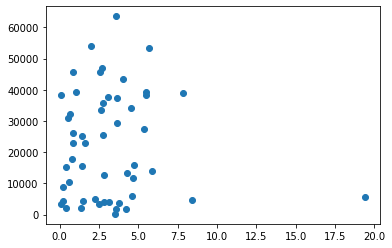

In [30]:
x= df['Change %']
y=df['clean_tweet']
plt.scatter(x, y)
plt.show()

In [31]:
#df2=df2[df2['text'].str.contains("want|need|demand|hold|moon|optimistic|positive|confident|strong|")]


